1.What is Logistic Regression, and how does it differ from Linear Regression?

--> **Logistic Regression vs. Linear Regression**

#### **1. Logistic Regression:**
Logistic Regression is a classification algorithm used to predict categorical outcomes (e.g., binary classification: yes/no, spam/not spam, survived/died). Despite its name, it is not a regression algorithm in the traditional sense but rather a probabilistic classification model.

- **Output:** Predicts the probability of a class (e.g., survival in the Titanic dataset).  
- **Activation Function:** Uses the **sigmoid function** to convert linear outputs into probabilities between 0 and 1:
  
 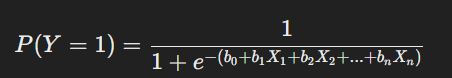

- **Decision Boundary:** Converts probabilities into class labels using a threshold (e.g., if \(P > 0.5\), classify as 1; else, classify as 0).
- **Loss Function:** Uses **log loss (cross-entropy loss)** instead of mean squared error.

#### **2. Linear Regression:**
Linear Regression is a regression algorithm used to predict continuous values (e.g., house prices, temperature).

- **Output:** Predicts a continuous numerical value.  
- **Function:** Uses a linear equation to model relationships:

 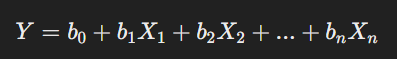

- **Loss Function:** Uses **Mean Squared Error (MSE)** to minimize the difference between predicted and actual values.

---

### **Key Differences:**
| Feature              | Logistic Regression        | Linear Regression           |
|----------------------|--------------------------|-----------------------------|
| **Type**            | Classification           | Regression                  |
| **Output**          | Categorical (0 or 1)     | Continuous (any real value) |
| **Function Used**   | Sigmoid function         | Linear equation             |
| **Loss Function**   | Log Loss (Cross-Entropy) | Mean Squared Error (MSE)    |
| **Interpretation**  | Probability of a class   | Direct numerical prediction |

### **When to Use What?**
- **Use Logistic Regression** when the target variable is categorical (e.g., spam detection, fraud detection).
- **Use Linear Regression** when predicting continuous values (e.g., predicting sales, stock prices).


2.What is the mathematical equation of Logistic Regression?

-->The **mathematical equation** of **Logistic Regression** is derived from **Linear Regression**, but instead of predicting a continuous value, it predicts the **probability** of an instance belonging to a particular class.

### **1. Linear Equation (Before Applying Sigmoid)**
A logistic regression model starts with a linear equation:

\[
z = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n
\]

where:
- \( z \) = Linear combination of input features.
- \( b_0 \) = Intercept (bias term).
- \( b_1, b_2, ..., b_n \) = Coefficients (weights) of the features.
- \( X_1, X_2, ..., X_n \) = Input features.

### **2. Applying the Sigmoid (Logistic) Function**
Since logistic regression is used for **classification**, we convert the linear output \( z \) into a **probability** using the **sigmoid function**:

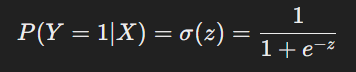

where:
- \( P(Y = 1 | X) \) = Probability that the instance belongs to class 1.
- \( e \) = Euler’s number (~2.718).
- \( \sigma(z) \) = Sigmoid function, which maps any real number into a range between 0 and 1.

### **3. Decision Rule**
To classify an instance:
\[
\hat{Y} =
\begin{cases}
1, & \text{if } P(Y = 1 | X) \geq 0.5 \\
0, & \text{if } P(Y = 1 | X) < 0.5
\end{cases}
\]

### **4. Log-Odds (Logit Function) Interpretation**
We can rewrite the equation in terms of **log-odds**:

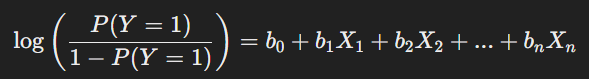

This equation shows that **logistic regression models the logarithm of the odds (log-odds) as a linear function of the input variables.**

### **Summary**
1. Compute \( z = b_0 + b_1X_1 + ... + b_nX_n \).
2. Convert \( z \) into a probability using the **sigmoid function**.
3. Classify based on a **threshold (default: 0.5)**.



3.Why do we use the Sigmoid function in Logistic Regression?

-->(a) Converts Linear Output into Probability
In Linear Regression, the output can be any real number (e.g., -10, 50, 1000), which is not suitable for classification.
The sigmoid function squashes these values into the range [0,1], which can be interpreted as a probability.

(b) Provides a Clear Decision Boundary
Once we get a probability from the sigmoid function, we can classify using a threshold (typically 0.5):

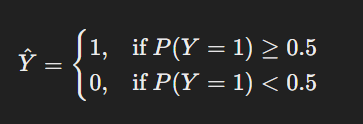
  

(c) Differentiable (Useful for Optimization)
The sigmoid function is smooth and differentiable, which is important because Logistic Regression is optimized using Gradient Descent.

The derivative of the sigmoid function is:


 (z)=σ(z)⋅(1−σ(z))

This property makes computation efficient and prevents extreme gradients.

(d) Models Log-Odds (Logistic Transformation)
The sigmoid function can be rewritten in terms of log-odds:

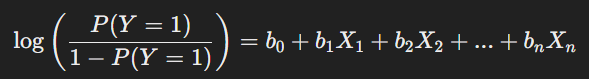
​

This shows that logistic regression models the log-odds as a linear function of the input features.



4.What is the cost function of Logistic Regression?

-->### **Cost Function of Logistic Regression**

In **Logistic Regression**, we use the **Log Loss (Logistic Loss) or Cross-Entropy Loss** as the **cost function** instead of Mean Squared Error (MSE), which is used in Linear Regression.

---

### **1. Why Not Use Mean Squared Error (MSE)?**
If we use **MSE** (as in Linear Regression), the cost function would be **non-convex** for Logistic Regression due to the **sigmoid function's non-linearity**, making gradient descent inefficient and prone to getting stuck in local minima.

To solve this, we use **Log Loss**, which ensures a **convex** function, making optimization easier.

---

### **2. Log Loss (Binary Cross-Entropy)**
For **binary classification** (e.g., predicting survival in Titanic dataset: 0 = Did not survive, 1 = Survived), the cost function is:

\[
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
\]

where:
- \( J(\theta) \) = Cost function to minimize.
- \( m \) = Number of training examples.
- \( y_i \) = Actual label (0 or 1).
- \( \hat{y}_i \) = Predicted probability \( P(Y=1|X) = \sigma(z) \), where \( z = b_0 + b_1X_1 + ... + b_nX_n \).
- \( \log(\hat{y}_i) \) penalizes **false negatives** (if \( y = 1 \) but \( \hat{y} \) is small).
- \( \log(1 - \hat{y}_i) \) penalizes **false positives** (if \( y = 0 \) but \( \hat{y} \) is large).

---

### **3. Understanding Log Loss with Cases**
#### **Case 1: Correct Prediction**
- If \( y = 1 \) and \( \hat{y} \) is close to 1 → **log(\(\hat{y}\)) is large (small loss)**.
- If \( y = 0 \) and \( \hat{y} \) is close to 0 → **log(\(1 - \hat{y}\)) is large (small loss)**.

#### **Case 2: Wrong Prediction**
- If \( y = 1 \) but \( \hat{y} \) is close to 0 → **log(\(\hat{y}\)) is small (large loss)**.
- If \( y = 0 \) but \( \hat{y} \) is close to 1 → **log(\(1 - \hat{y}\)) is small (large loss)**.

Thus, Log Loss **penalizes wrong predictions heavily**, encouraging the model to make confident and correct predictions.

---

### **4. Log Loss is Convex (Good for Gradient Descent)**
- The cost function is **convex**, meaning it has a single global minimum.
- This makes **Gradient Descent optimization efficient** for finding the best parameters (\( b_0, b_1, ... \)).


5.What is Regularization in Logistic Regression? Why is it needed?

-->Regularization in Logistic Regression
Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function in Logistic Regression. It helps in keeping model weights small, making the model more generalizable to unseen data.

1. Why is Regularization Needed?
When training a logistic regression model, the model parameters (
𝜃
θ) are learned to minimize the log loss function:

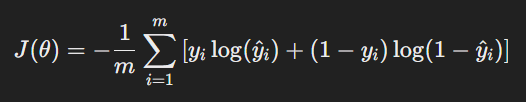

Problems Without Regularization
If there are too many features, the model may memorize the training data rather than generalizing well.
The learned coefficients (
𝜃
θ) can have very large values, leading to a high variance model.
This causes overfitting, meaning the model performs well on training data but poorly on unseen test data.
2. Types of Regularization
(a) L2 Regularization (Ridge Regression)
Adds the squared sum of weights to the cost function:

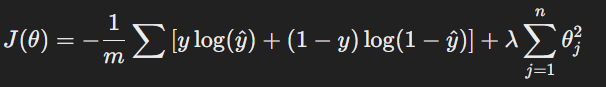

Effect: Penalizes large weights, forcing them to be smaller and more balanced.
Usage: Helps when there is multicollinearity (highly correlated features).

(b) L1 Regularization (Lasso Regression)
Adds the absolute sum of weights to the cost function:

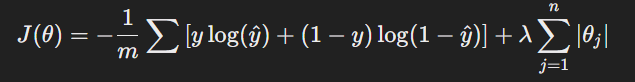

Effect: Some feature weights are driven to exactly zero, effectively performing feature selection.
Usage: Helps when we want to remove less important features.
(c) Elastic Net Regularization
Combination of L1 and L2 regularization:

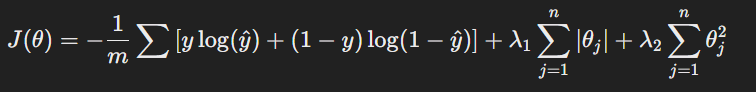

Effect: Balances feature selection (L1) and small weights (L2).
Usage: Useful when there are many correlated features.


###6. **Explain the difference between Lasso, Ridge, and Elastic Net regression**  
- **Lasso (L1)**: Shrinks some coefficients to **exactly zero** (feature selection).  
- **Ridge (L2)**: Shrinks coefficients but keeps all features (reduces multicollinearity).  
- **Elastic Net**: Combination of L1 and L2, balances feature selection and shrinkage.  

---

###7. **When should we use Elastic Net instead of Lasso or Ridge?**  
- Use **Elastic Net** when **features are highly correlated** since it balances feature selection (L1) and coefficient shrinkage (L2).  

---

###8. **What is the impact of the regularization parameter (λ) in Logistic Regression?**  
- **Higher \( \lambda \)** → Stronger regularization, shrinks coefficients (prevents overfitting).  
- **Lower \( \lambda \)** → Weaker regularization, allows model to fit better (risk of overfitting).  

---

### 9.**What are the key assumptions of Logistic Regression?**  
1. **No multicollinearity** – Independent variables should not be highly correlated.  
2. **Linear relationship between predictors and log-odds** (not direct probabilities).  
3. **No extreme outliers** – Outliers can distort decision boundaries.  

---

###10. **What are some alternatives to Logistic Regression for classification tasks?**  
- **Decision Trees**  
- **Random Forest**  
- **Support Vector Machines (SVM)**  
- **Naive Bayes**  
- **Neural Networks (Deep Learning)**  

---

###11. **What are Classification Evaluation Metrics?**  
- **Accuracy**: Correct predictions / Total predictions  
- **Precision**: TP / (TP + FP) (Positive class correctness)  
- **Recall**: TP / (TP + FN) (Sensitivity)  
- **F1-Score**: Harmonic mean of Precision & Recall  
- **ROC-AUC**: Measures discrimination ability of the classifier  

---

###12. **How does class imbalance affect Logistic Regression?**  
- The model becomes **biased towards the majority class**.  
- Solutions:  
  - **Resampling (Oversampling minority / Undersampling majority)**  
  - **Using class-weighted loss function (`class_weight='balanced'`)**  
  - **Using alternative metrics like Precision-Recall instead of Accuracy**  

---

###13. **What is Hyperparameter Tuning in Logistic Regression?**  
- Adjusting parameters like:  
  - **Regularization strength (\(C = 1/\lambda\))**  
  - **Penalty type (L1, L2, Elastic Net)**  
  - **Solver (`liblinear`, `saga`, etc.)**  
- Done using **Grid Search** or **Random Search**.  

---

###14. **What are different solvers in Logistic Regression? Which one should be used?**  
- `liblinear` → Best for **small datasets** (supports L1 & L2).  
- `saga` → Best for **large datasets & Elastic Net**.  
- `lbfgs` → Best for **multiclass classification**.  
- `newton-cg` → Works well with **L2 penalty**.  

---

###15. **How is Logistic Regression extended for multiclass classification?**  
- **One-vs-Rest (OvR)**: Trains separate binary classifiers for each class.  
- **Softmax Regression (Multinomial LR)**: Directly predicts probability for multiple classes.  

---

###16. **What are the advantages and disadvantages of Logistic Regression?**  
✅ **Advantages**  
- Simple & easy to interpret.  
- Works well for **linearly separable** data.  
- Computationally efficient.  

❌ **Disadvantages**  
- **Assumes linear decision boundary** (fails for complex patterns).  
- **Sensitive to outliers**.  
- **Not ideal for high-dimensional data**.  

---

###17. **What are some use cases of Logistic Regression?**  
- **Medical Diagnosis** (Disease prediction).  
- **Spam Detection** (Email classification).  
- **Customer Churn Prediction**.  
- **Credit Risk Assessment**.  

---

###18. **What is the difference between Softmax Regression and Logistic Regression?**  
- **Logistic Regression** → Used for **binary classification** (outputs probability for one class).  
- **Softmax Regression** → Used for **multiclass classification** (outputs probability distribution across all classes).  

---

### 19.**How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?**  
- **OvR**: Works well for small datasets and when classes are **not highly imbalanced**.  
- **Softmax**: Works better for **balanced** multiclass problems and **mutually exclusive** categories.  

---

###20. **How do we interpret coefficients in Logistic Regression?**  
- **Positive coefficient (\(+\))** → Increases the probability of the event happening.  
- **Negative coefficient (\(-\))** → Decreases the probability of the event happening.  
- **Magnitude of coefficient** → Larger values mean stronger influence on prediction.  
- **Interpretation** (Odds Ratio):  
  - A coefficient of **\( b \)** means increasing **\( X \)** by 1 unit **multiplies the odds** by **\( e^b \)**.  



In [32]:
#1.Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
#Regression, and prints the model accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target

In [ ]:
#for binary classification>> only two class needed, so we will filter out class 2

df = df[df['target'] != 2]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [ ]:
df.target.unique()

array([0, 1])

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
X_train.shape,X_test.shape

((70, 4), (30, 4))

In [ ]:
y_train.shape,y_test.shape

((70,), (30,))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

2.Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
l1_model =LogisticRegression(penalty='l1',solver='liblinear',max_iter=200)

In [ ]:
l1_model.fit(X_train,y_train)

LogisticRegression(max_iter=200, penalty='l1', solver='liblinear')

In [ ]:
y_pred_l1_model = l1_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_l1_model)

1.0

3.Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

In [ ]:
l2_model = LogisticRegression(penalty = 'l2' , solver = 'liblinear',max_iter=200)
l2_model

LogisticRegression(max_iter=200, solver='liblinear')

In [ ]:
l2_model.fit(X_train,y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [ ]:
y_pred_l2_model = l2_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_l2_model)

1.0

4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').

In [ ]:
elasticnet_model = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5,max_iter=200)
elasticnet_model

LogisticRegression(l1_ratio=0.5, max_iter=200, penalty='elasticnet',
                   solver='saga')

In [ ]:
elasticnet_model.fit(X_train,y_train)

LogisticRegression(l1_ratio=0.5, max_iter=200, penalty='elasticnet',
                   solver='saga')

In [ ]:
y_pred_elasticnet_model = elasticnet_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_elasticnet_model)

1.0

5.Write a Python program to train a Logistic Regression model for multiclass classification using
multi_class='ovr'

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000,n_features=10,n_redundant=5,n_informative=5,n_classes=3,random_state=1)

In [ ]:
y

array([1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       0, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2,
       1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1,
       0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
X_train.shape,y_test.shape

((700, 10), (300,))

In [ ]:
##ovr(one versus rest)
ovr_model = LogisticRegression(multi_class='ovr',solver='lbfgs')

In [ ]:
ovr_model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
y_pred_ovr_model = ovr_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred_ovr_model))
print(accuracy_score(y_test, y_pred_ovr_model))
print(classification_report(y_test, y_pred_ovr_model))

[[75 21  3]
 [10 58 21]
 [23 14 75]]
0.6933333333333334
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        99
           1       0.62      0.65      0.64        89
           2       0.76      0.67      0.71       112

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.70      0.69      0.69       300



6.Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
Regression. Print the best parameters and accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty' :('l1','l2','elasticnet'),'C' : [1,2,3,5,6,10,20,11,]}

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [ ]:
clf = GridSearchCV(classifier,param_grid=parameters,cv=5,verbose=2)
clf

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 5, 6, 10, 20, 11],
                         'penalty': ('l1', 'l2', 'elasticnet')},
             verbose=2)

In [ ]:
X_train.shape,y_test.shape

((700, 10), (300,))

In [ ]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penal

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 5, 6, 10, 20, 11],
                         'penalty': ('l1', 'l2', 'elasticnet')},
             verbose=2)

In [ ]:
best_parameters = clf.best_params_
print(best_parameters)

{'C': 1, 'penalty': 'l2'}


In [ ]:
y_pred_grid_model = clf.best_estimator_.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_grid_model)

0.6833333333333333

7.Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
average accuracy

In [ ]:
#here i am using model that is trained on iris dataset
model

LogisticRegression()

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

In [ ]:
scores = cross_val_score(model,X,y,cv=skf,scoring='accuracy')

In [ ]:
average_accuracy = np.mean(scores)
print(f'Average Model Accuracy with Stratified K-Fold Cross-Validation: {average_accuracy:.2f}')

Average Model Accuracy with Stratified K-Fold Cross-Validation: 0.68


 8.Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its
accuracy

In [ ]:
df1 = pd.read_csv('logistic_regression.csv')
df1

,Studied,Slept,Passed
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1
...,...,...,...
95,0.022280,2.658428,0
96,7.630637,7.405351,1
97,3.684997,5.049965,0
98,7.484260,6.059396,1


In [ ]:
df1.isna().sum()

,0
Studied,0
Slept,0
Passed,0


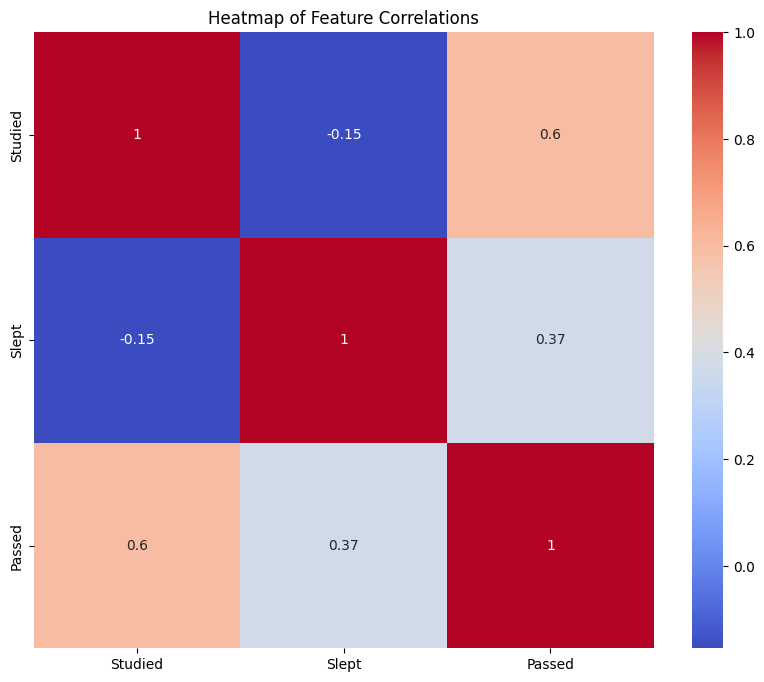

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

In [ ]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [ ]:
X

,Studied,Slept
0,4.855064,9.639962
1,8.625440,0.058927
2,3.828192,0.723199
3,7.150955,3.899420
4,6.477900,8.198181
...,...,...
95,0.022280,2.658428
96,7.630637,7.405351
97,3.684997,5.049965
98,7.484260,6.059396


In [ ]:
y

,Passed
0,1
1,0
2,0
3,1
4,1
...,...
95,0
96,1
97,0
98,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
X_train.shape,y_test.shape

((70, 2), (30,))

In [ ]:
from sklearn.linear_model import LogisticRegression
new_model = LogisticRegression()
new_model

LogisticRegression()

In [ ]:
new_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_new_model = new_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_new_model)

0.8666666666666667

9.Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
Logistic Regression. Print the best parameters and accuracy

In [ ]:
#here  i am using above model RandomizedSearchCV for tuning hyperparameters in Logistic Regression.
new_model = LogisticRegression(max_iter=100)

In [ ]:
'''np.logspace(-4, 4, 20): This generates a sequence of numbers using the numpy.
logspace function. It creates an array of numbers that are evenly spaced
on a logarithmic scale between
10 raised to power−4 and 10 raised to power 4 with a total of 20 values.
To illustrate, the values generated by np.logspace(-4, 4, 20) will look something like this
(note that these are approximate values):
e.g [
0.0001,0.000263,0.000693..........1438.449,3792.69,10000'''

param_dist = {
    'C' : np.logspace(-4,4,20),
    'penalty' : ['l1','l2','elasticnet'],
    'solver' : ['liblinear','saga']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(new_model, param_distributions=param_dist, n_iter=10, cv=5, verbose=1,)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   verbose=1)

In [ ]:
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.623776739188721}


In [ ]:
# Predict and calculate accuracy
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8666666666666667


10.Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500,n_features=8,n_redundant=4,n_informative=4,n_classes=3,random_state=1)

In [ ]:
y

array([2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1,
       2, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2,
       2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1,
       1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2,
       0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2,
       0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0,
       1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1,
       0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0,
       1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [ ]:
X_train.shape,y_test.shape

((400, 8), (100,))

In [ ]:
log_reg_model = LogisticRegression(max_iter=200)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(log_reg_model)

In [ ]:
ovo_clf.fit(X_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=200))

In [ ]:
y_pred_ovo = ovo_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_ovo)
print(f"Accuracy: {accuracy}")

Accuracy: 0.66


 11.Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
classification

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100,n_features=4,n_redundant=2,n_informative=2,n_classes=2,random_state=1)

In [ ]:
X.shape,y.shape

((100, 4), (100,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"penalty": ("l1", "l2", "elasticnet"), 'C': [1, 2, 10, 20, 30, 40]}

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1

LogisticRegression()

In [ ]:
clf1 = GridSearchCV(classifier, param_grid=params, cv = 5, verbose=2)
clf1

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ('l1', 'l2', 'elasticnet')},
             verbose=2)

In [ ]:
clf1.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penalt

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ('l1', 'l2', 'elasticnet')},
             verbose=2)

In [ ]:
y_pred_clf1 = clf1.best_estimator_.predict(X_test)

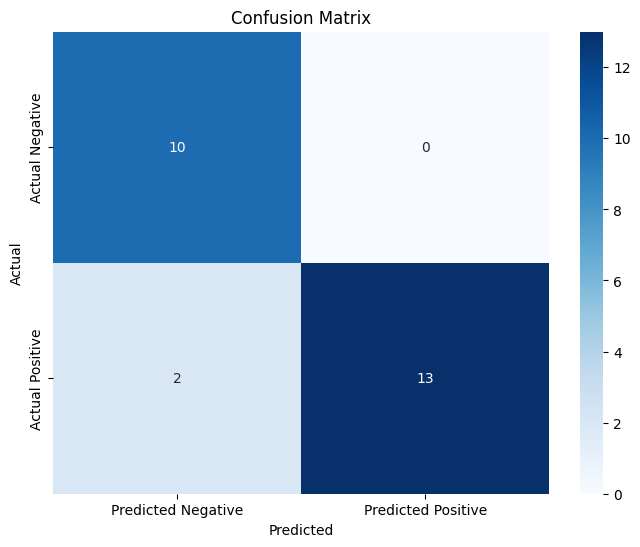

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_clf1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

12.Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
Recall, and F1-Score

In [ ]:
# to evaluate performance using Precision, Recall, and F1-Score i am using above model
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_clf1)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



13.Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
improve model performance

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000,n_features=10,n_classes=2,weights=[0.9,0.1],random_state=1)

In [ ]:
X.shape

(1000, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.30)

In [ ]:
X_train.shape,y_test.shape

((700, 10), (300,))

In [ ]:
imb_model = LogisticRegression(class_weight='balanced',max_iter=1000)
#imb_model = LogisticRegression(max_iter=1000)
#without applying class_weight the model accuracy is 92 % approxx

In [ ]:
imb_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_pred_imb_model = imb_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_imb_model)

0.8533333333333334

14.Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
evaluate performance.

In [3]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [8]:
#selecting relevant features
features = ['pclass','sex','age','sibsp','parch','fare','embarked']
df = df[features+['survived']]
df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [9]:
#exploratory data analysis
df.isnull().sum()

,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
survived,0


In [10]:
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [11]:
df.survived.value_counts()

,count
survived,
0,549
1,342


In [13]:
#handling missing values
df['age'].fillna(df['age'].median(),inplace=True)

In [14]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [15]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
survived,0


In [21]:
#encoding categorical variables
df = pd.get_dummies(df,columns=['sex','embarked'],drop_first=True)

In [22]:
#splitting dataset into X and y
X = df.drop(columns=['survived'])
y = df['survived']

In [23]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [24]:
#training the logistic regression model
from sklearn.linear_model import LogisticRegression
titanic_model = LogisticRegression()
titanic_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
#making prediction
y_pred = titanic_model.predict(X_test)

In [26]:
#evaluating performance
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7723880597014925

15.Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
model. Evaluate its accuracy and compare results with and without scaling

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df['target'] = data.target

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape,y_test.shape

((455, 30), (114,))

In [ ]:
model_no_scaling = LogisticRegression(max_iter=10000)
model_no_scaling.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_no_scaling = model_no_scaling.predict(X_test)

In [ ]:
accuracy_no_scaling = accuracy_score(y_test,y_pred_no_scaling)
print(f"Accuracy without scaling: {accuracy_no_scaling:.2f}")

Accuracy without scaling: 0.95


In [ ]:
#FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Training Logistic Regression model with scaling
model_scaled = LogisticRegression(max_iter=10000)
model_scaled.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
report_scaled = classification_report(y_test, y_pred_scaled)

print(f"Accuracy with scaling: {accuracy_scaled:.2f}")
print("Classification Report with Scaling:\n", report_scaled)


Accuracy with scaling: 0.63
Classification Report with Scaling:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.63      1.00      0.77        72

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



16.Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

In [ ]:
#I will evaluate above model performance using ROC-AUC score which will be best for comparision
#for scaled and without scaled model
from sklearn.metrics import roc_auc_score
y_pred_proba_no_scaling = model_no_scaling.predict_proba(X_test)[:,1]
roc_auc_no_scaling = roc_auc_score(y_test,y_pred_proba_no_scaling)
print(f"ROC AND AUC WITHOUT SCALING:{roc_auc_no_scaling:.2f}")

y_pred_proba_scaled = model_scaled.predict_proba(X_test)[:,1]
roc_auc_scaled = roc_auc_score(y_test,y_pred_proba_scaled)
print(f"ROC AND AUC WITH SCALING :{roc_auc_scaled:.2f}")
# this indicates that the model is performing extremely well in distinguishing between the two classes.

ROC AND AUC WITHOUT SCALING:0.99
ROC AND AUC WITH SCALING :0.99


17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
accuracy

In [ ]:
#Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy on same above dataset
model_custom = LogisticRegression(C=0.5,max_iter=10000)
model_custom.fit(X_train,y_train)

LogisticRegression(C=0.5, max_iter=10000)

In [ ]:
y_pred_custom = model_custom.predict(X_test_scaled)
y_pred_proba_custom = model_custom.predict_proba(X_test_scaled)[:,1]
accuracy_custom = accuracy_score(y_test,y_pred_custom)

In [ ]:
print(f"Accuracy with C=0.5: {accuracy_custom:.2f}")

Accuracy with C=0.5: 0.63


18. Write a Python program to train Logistic Regression and identify important features based on model
coefficients.

In [29]:
# we will identify important features based on model coefficients.
feature_importance = pd.DataFrame({'Feature':X.columns, 'Coefficient':titanic_model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient',ascending=False)
print("\nFeature Importance:\n", feature_importance)


Feature Importance:
       Feature  Coefficient
6  embarked_Q     0.134556
3       parch     0.117288
4        fare    -0.000275
1         age    -0.041728
7  embarked_S    -0.307736
2       sibsp    -0.334427
0      pclass    -1.175707
5    sex_male    -2.705328


19.Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
Score.

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df =pd.DataFrame(data.data,columns=data.feature_names)
mask = data.target !=2
df = df[mask].copy()

In [ ]:
df['target'] = data.target[mask]# Convert to binary classification

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
model_iris = LogisticRegression(C=1.0, max_iter=10000)
model_iris.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_iris = model_iris.predict(X_test)

In [ ]:
from sklearn.metrics import cohen_kappa_score
accuracy = accuracy_score(y_test, y_pred_iris)
kappa = cohen_kappa_score(y_test, y_pred_iris)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Cohen’s Kappa Score: {kappa:.2f}")

Accuracy: 1.00
Cohen’s Kappa Score: 1.00


20.Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
classification.

In [ ]:
#we will visualize the Precision-Recall Curve for model_iris.

In [ ]:
report = classification_report(y_test, y_pred_iris)

In [ ]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, precision_recall_curve, auc
y_scores = model_iris.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

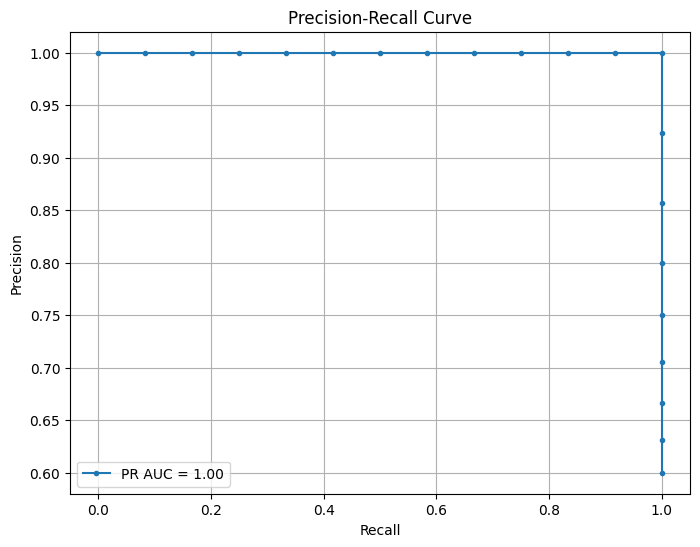

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

 21.Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
their accuracy.

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
solvers = ['liblinear', 'saga', 'lbfgs']
results = {}

In [ ]:
solvers = ['liblinear', 'saga', 'lbfgs']
results = {}

for solver in solvers:
    model = LogisticRegression(solver=solver, C=1.0, max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[solver] = accuracy

In [ ]:
print(f"Solver: {solver}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("-" * 50)

Solver: lbfgs
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.88       101

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200

--------------------------------------------------


22.Write a Python program to train Logistic Regression and evaluate its performance using Matthews
Correlation Coefficient (MCC).

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
#evaluating performance using Matthews Correlation Coefficient (MCC) of above model.
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

Matthews Correlation Coefficient (MCC): 0.75


23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
accuracy to see the impact of feature scaling.

In [ ]:
#using above synthetic dataset.
model_raw = LogisticRegression(solver='liblinear', C=1.0, max_iter=10000)
model_raw.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [ ]:
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train on standardized data
model_scaled = LogisticRegression(solver='liblinear', C=1.0, max_iter=10000)
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [ ]:
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

In [ ]:
# Print results
print(f"Accuracy on raw data: {accuracy_raw:.2f}")
print("Classification Report (Raw Data):\n", classification_report(y_test, y_pred_raw))
print("-" * 50)
print(f"Accuracy on standardized data: {accuracy_scaled:.2f}")
print("Classification Report (Standardized Data):\n", classification_report(y_test, y_pred_scaled))

Accuracy on raw data: 0.88
Classification Report (Raw Data):
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.88       101

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200

--------------------------------------------------
Accuracy on standardized data: 0.88
Classification Report (Standardized Data):
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.88       101

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



24.Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Find optimal C using cross-validation
C_values = np.logspace(-3, 3, 10)
best_C = None
best_score = 0

In [ ]:
for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=10000)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_C = C

In [ ]:
print(f"Optimal C: {best_C:.3f} with cross-validation accuracy: {best_score:.2f}")

Optimal C: 0.100 with cross-validation accuracy: 0.85


25.Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
make predictions.

In [ ]:
# Train Logistic Regression model using same synthetic dataset
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [ ]:
# Save the trained model
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# Load the trained model
loaded_model = joblib.load('logistic_regression_model.pkl')
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
# Make predictions with the loaded model
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Print results
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.88       101

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200

